# ReCell Project

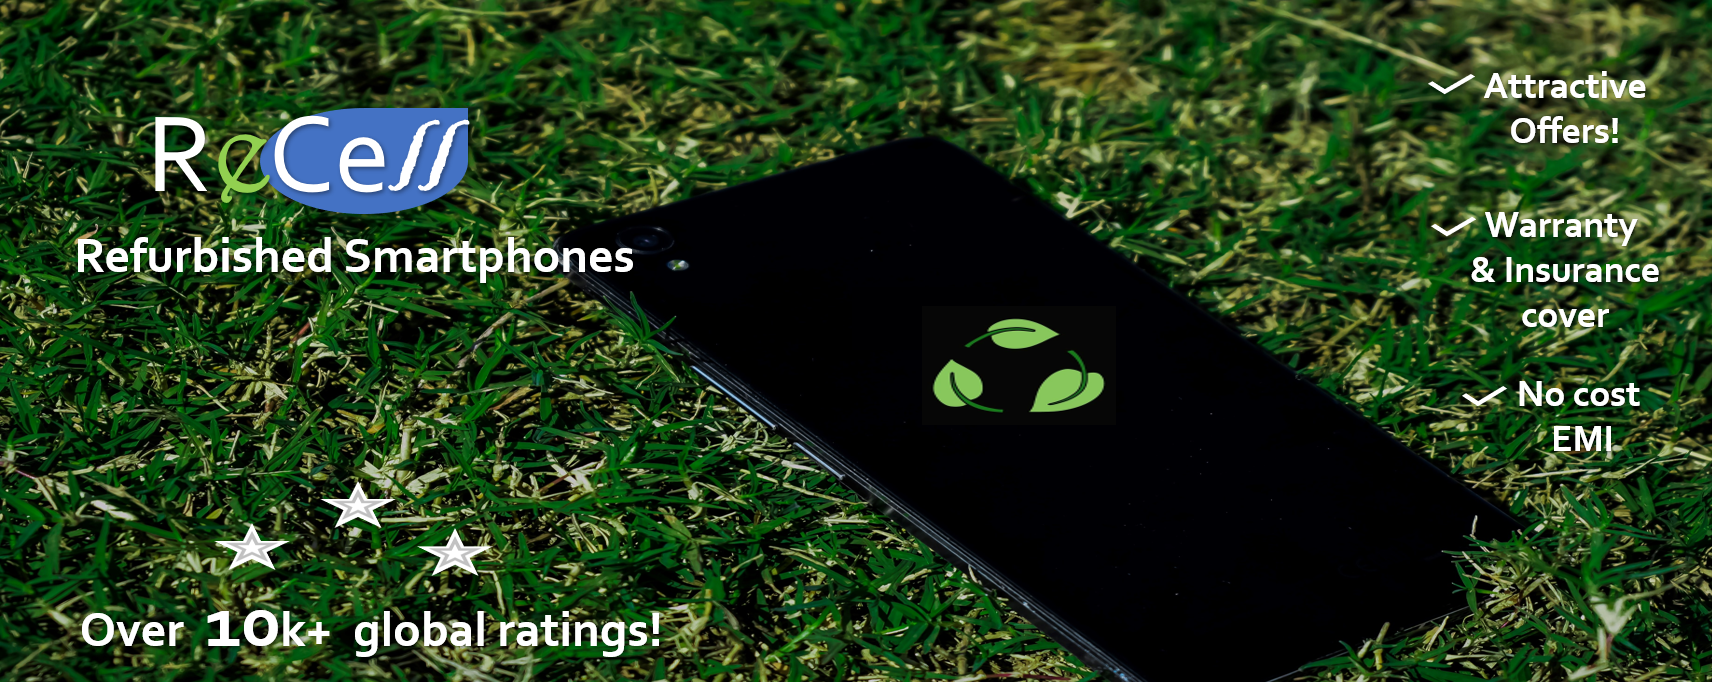

In [ ]:
from IPython.display import Image
Image('ReCell_image.png')

### Description

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 

Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

Data Dictionary

* brand_name: Name of manufacturing brand
* os: OS on which the device runs
* screen_size: Size of the screen in cm
* 4g: Whether 4G is available or not
* 5g: Whether 5G is available or not
* main_camera_mp: Resolution of the rear camera in megapixels
* selfie_camera_mp: Resolution of the front camera in megapixels
* int_memory: Amount of internal memory (ROM) in GB
* ram: Amount of RAM in GB
* battery: Energy capacity of the device battery in mAh
* weight: Weight of the device in grams
* release_year: Year when the device model was released
* days_used: Number of days the used/refurbished device has been used
* normalized_new_price: Normalized price of a new device of the same model in euros
* normalized_used_price: Normalized price of the used/refurbished device in euros

###  Importing necessary libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import libraries for statistical analysis
import scipy.stats as stats

# split the data into train and test
from sklearn.model_selection import train_test_split

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# to build linear regression_model
import statsmodels.api as sm

### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project3/used_device_data.csv')

### Sanity Checks

In [ ]:
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       14.500  yes   no          13.000   
1      Honor  Android       17.300  yes  yes          13.000   
2      Honor  Android       16.690  yes  yes          13.000   
3      Honor  Android       25.500  yes  yes          13.000   
4      Honor  Android       15.320  yes   no          13.000   

   selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
0             5.000      64.000 3.000 3020.000 146.000          2020   
1            16.000     128.000 8.000 4300.000 213.000          2020   
2             8.000     128.000 8.000 4200.000 213.000          2020   
3             8.000      64.000 6.000 7250.000 480.000          2020   
4             8.000      64.000 3.000 5000.000 185.000          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127                  4.308                 4.715  
1        325                  5.162                 5.519  
2        162                  5.111                 5.885  
3        345                  5.135                 5.631  
4        293                  4.390                 4.948

In [ ]:
df.shape

(3454, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 4 categorical variables and 9 numerical variables.

#### Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

#### Checking for missing values

In [ ]:
# Check for total number of missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* The main campera has 179 missing values. 
* There are 5 other numerical variables that are missing less than 10 rows of information. 

#### Statistical summary of the dataset

In [ ]:
# Return a statistical summary of the numerical data
df.describe()

screen_size  main_camera_mp  selfie_camera_mp  int_memory      ram  \
count     3454.000        3275.000          3452.000    3450.000 3450.000   
mean        13.713           9.460             6.554      54.573    4.036   
std          3.805           4.815             6.970      84.972    1.365   
min          5.080           0.080             0.000       0.010    0.020   
25%         12.700           5.000             2.000      16.000    4.000   
50%         12.830           8.000             5.000      32.000    4.000   
75%         15.340          13.000             8.000      64.000    4.000   
max         30.710          48.000            32.000    1024.000   12.000   

       battery   weight  release_year  days_used  normalized_used_price  \
count 3448.000 3447.000      3454.000   3454.000               3454.000   
mean  3133.403  182.752      2015.965    674.870                  4.365   
std   1299.683   88.413         2.298    248.580                  0.589   
min    500.000   69.000      2013.000     91.000                  1.537   
25%   2100.000  142.000      2014.000    533.500                  4.034   
50%   3000.000  160.000      2015.500    690.500                  4.405   
75%   4000.000  185.000      2018.000    868.750                  4.756   
max   9720.000  855.000      2020.000   1094.000                  6.619   

       normalized_new_price  
count              3454.000  
mean                  5.233  
std                   0.684  
min                   2.901  
25%                   4.790  
50%                   5.246  
75%                   5.674  
max                   7.848

**Observations**
* The average screen size is 13.71 cm, while the median is 12.83 cm. 
* The average phone in this dataset came from release year 2015.
* The overall range for release year is 2013-2020. This means phones are resold between the age of 1 to 8 years. 
* Much of this data shows a right skewness, especially internal memory and weight. 
* It is worth closely reviewing the univariate analysis for two factors: 
    1.  To see if Mode is a better tool describe industry standard.
    2.  To see if there are any questionable outliers that could be skewing the data.




### Univariate Analysis

In [ ]:
# Histogram Box Plot User Defined Function
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

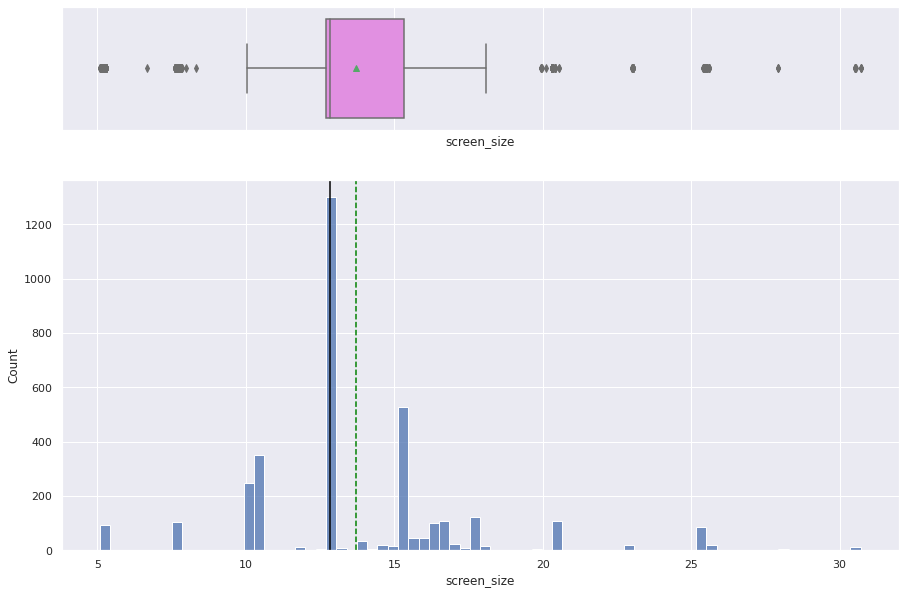

In [ ]:
histogram_boxplot(df, 'screen_size')

* We see the mode falls closer to the 25% percentile mark, 12.7cm.

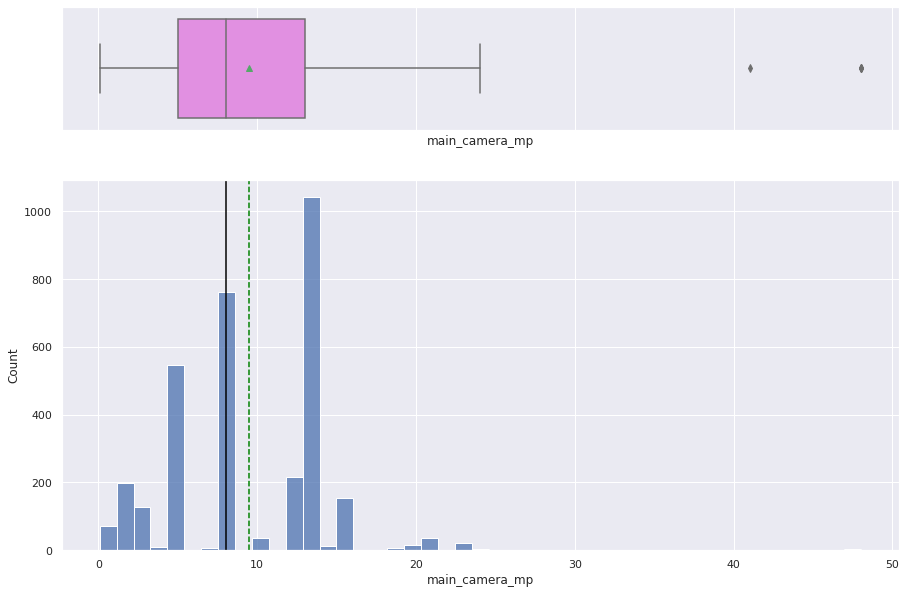

In [ ]:
histogram_boxplot(df, 'main_camera_mp')

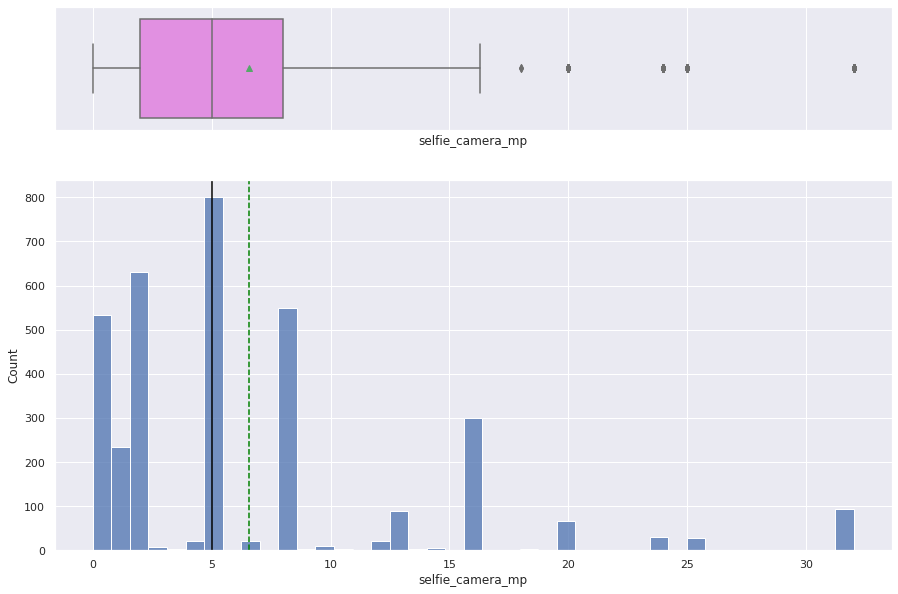

In [ ]:
histogram_boxplot(df, 'selfie_camera_mp')



*   Both types of cameras have similar box plots, indicating their interquartile ranges are similar. 
*   However, the histogram for the selfie camera shows more outliers. 



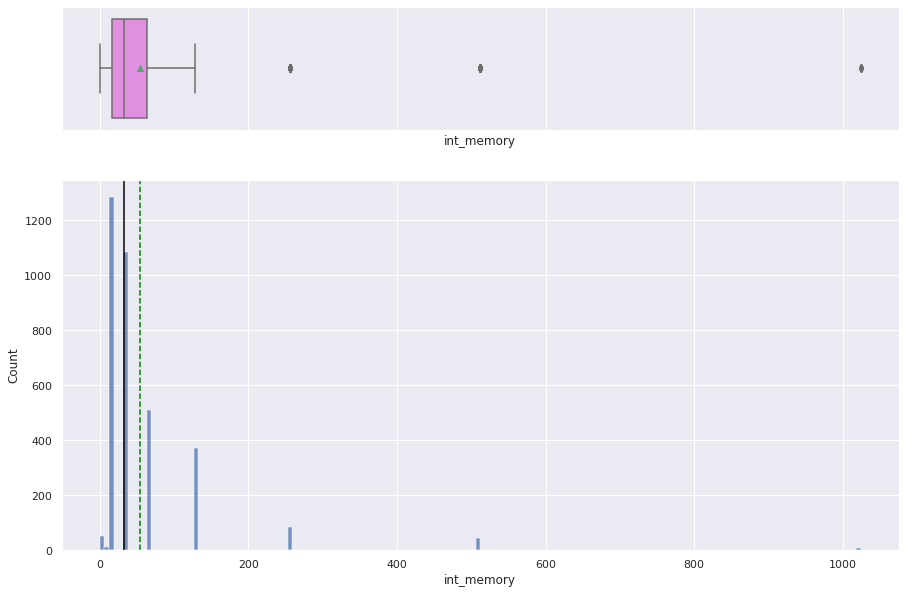

In [ ]:
histogram_boxplot(df, 'int_memory')

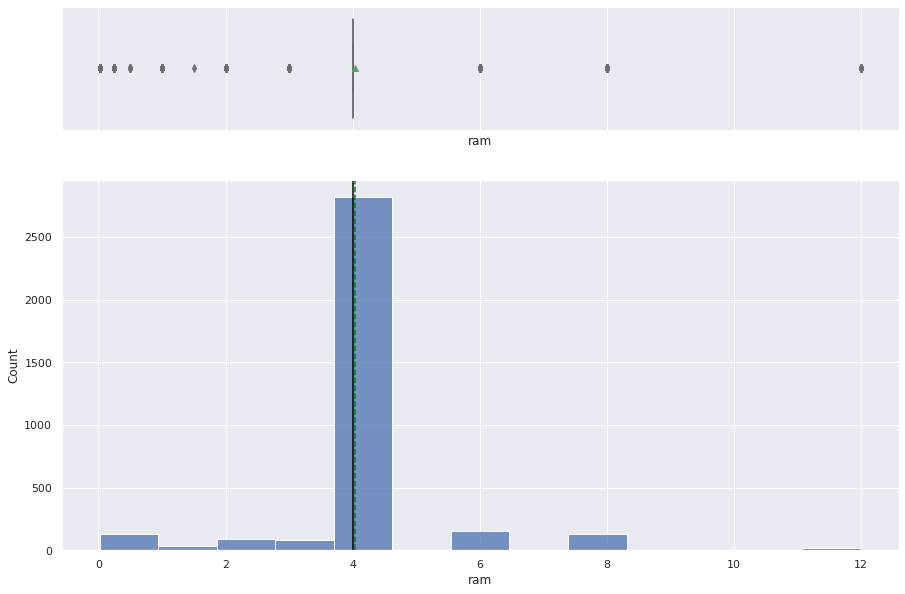

In [ ]:
histogram_boxplot(df, 'ram')

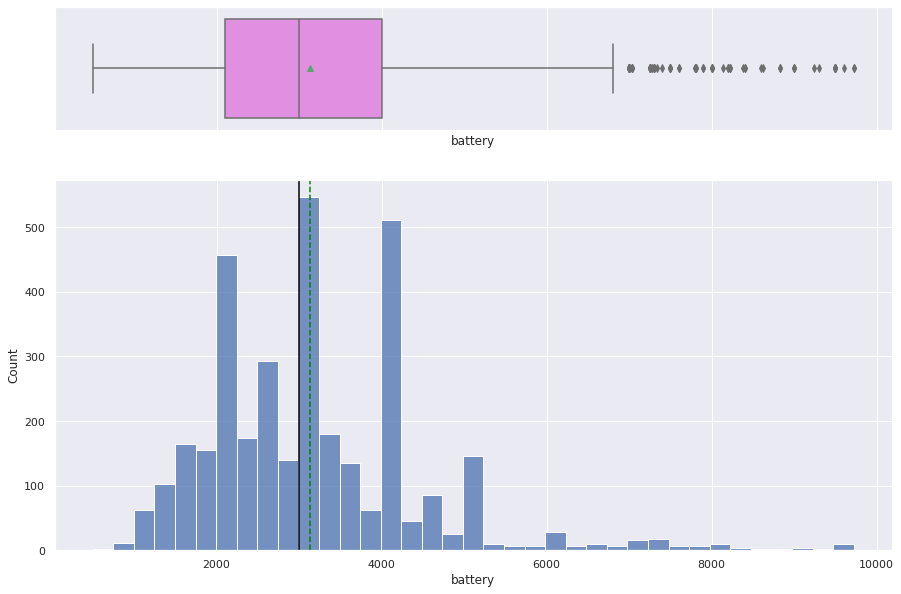

In [ ]:
histogram_boxplot(df, 'battery')

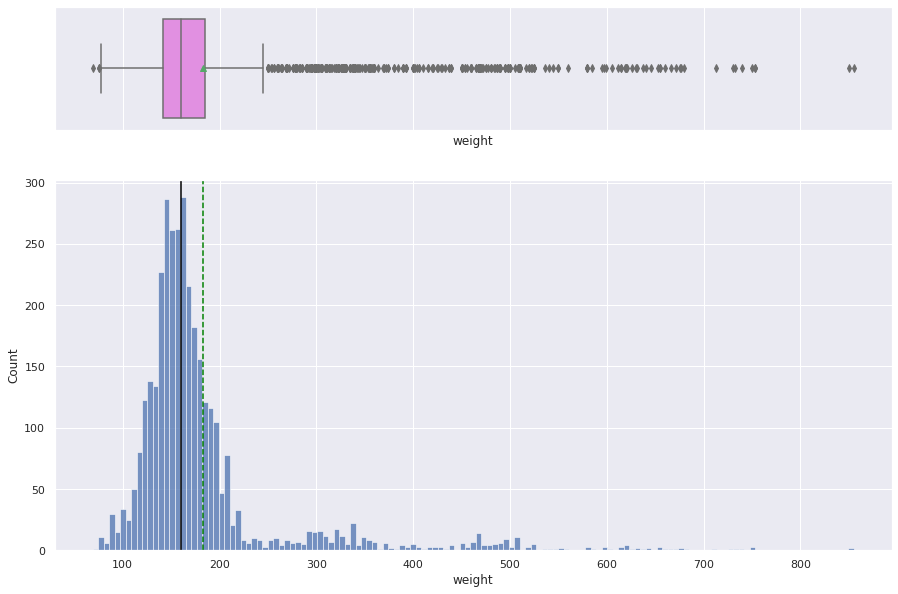

In [ ]:
histogram_boxplot(df, 'weight')

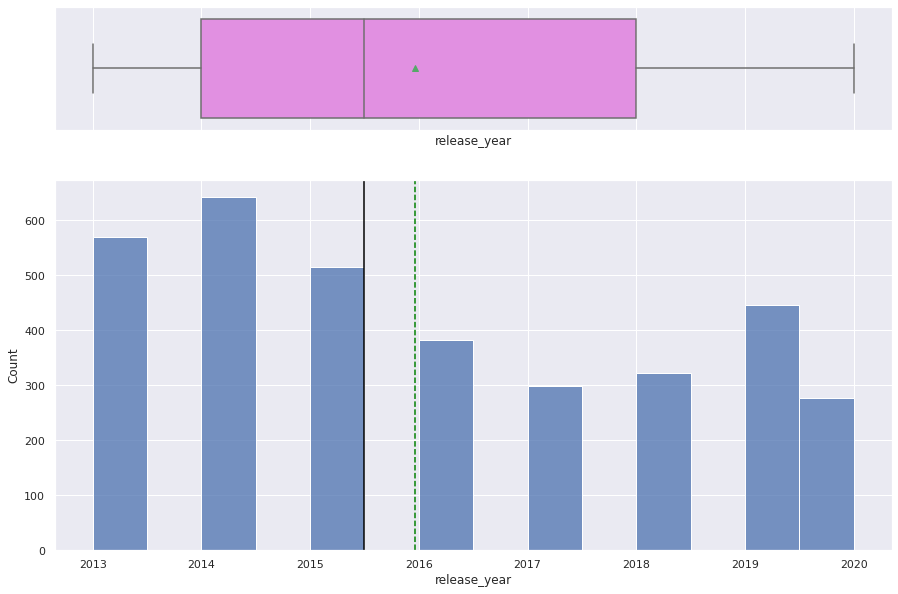

In [ ]:
histogram_boxplot(df, 'release_year')

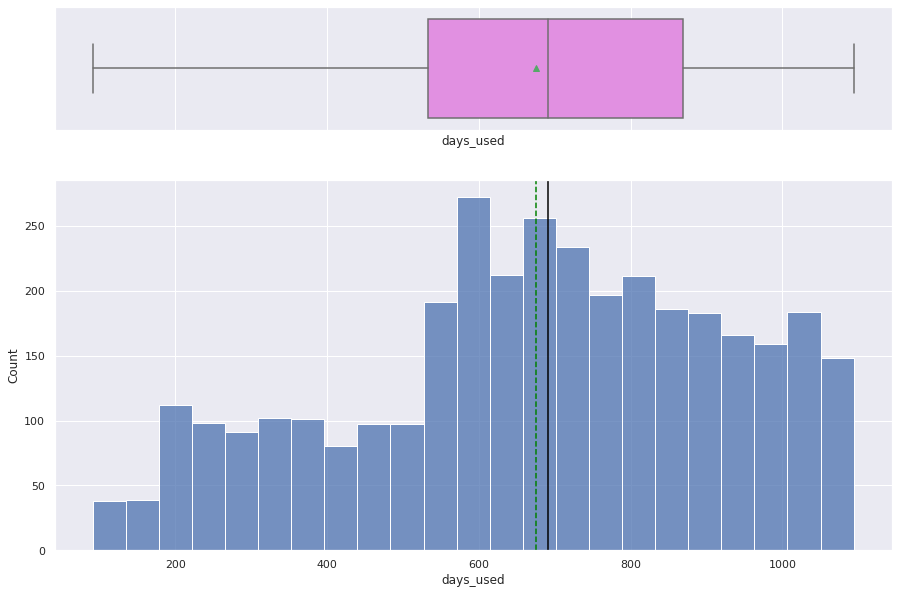

In [ ]:
histogram_boxplot(df, 'days_used')

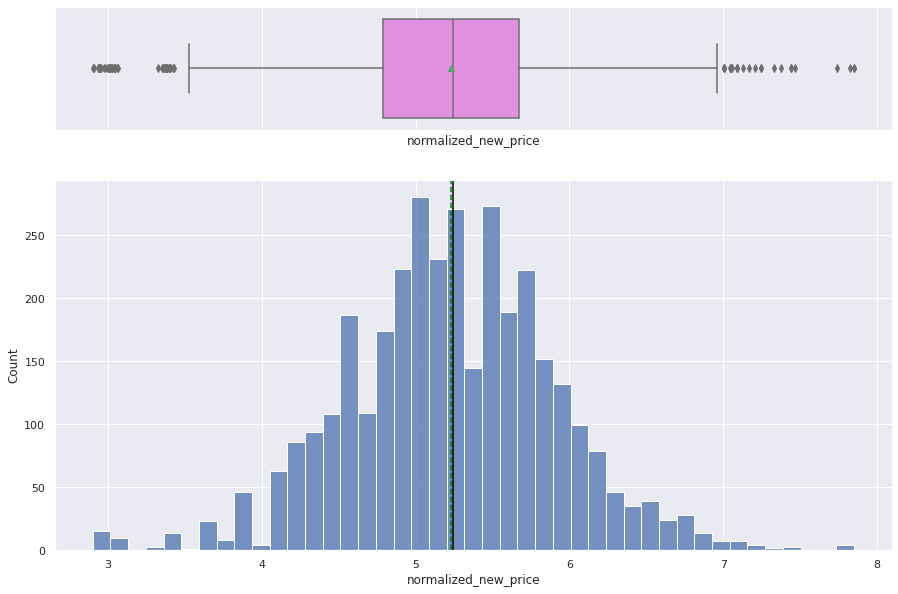

In [ ]:
histogram_boxplot(df, 'normalized_new_price')

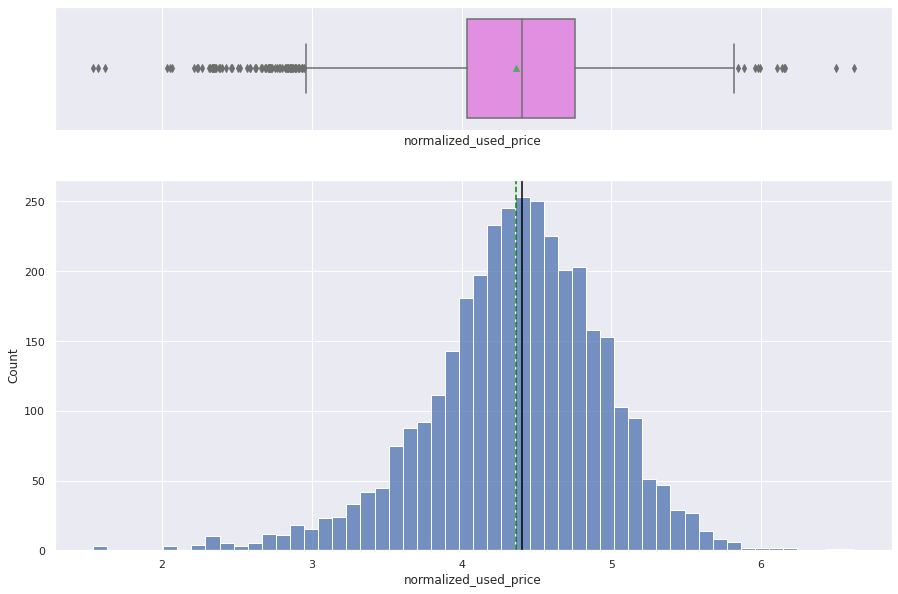

In [ ]:
histogram_boxplot(df, 'normalized_used_price')


**Observations on numerical columns:**
*   The only numerical columns that did not have outliers were the year released and days used.
*   Based on the box plots, the specs of these phones are not going to vastly differ from one brand or release year to another. This could indicate the correlation coefficients will be low on our models. 
*   The histograms clearly indicate that phone aspects such as ram, camera features, and screen size tend to follow an industry standard, which is my their mode is so high compared to the remaining data in the columns. 






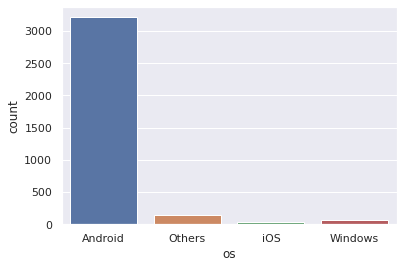

In [ ]:
sns.countplot(data=df, x='os');
plt.show()

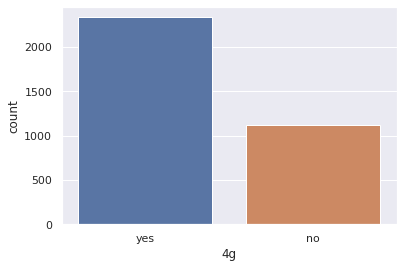

In [ ]:
sns.countplot(data=df, x='4g');
plt.show()

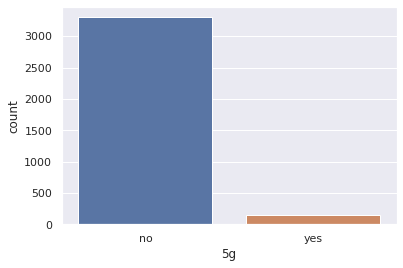

In [ ]:
sns.countplot(data=df, x='5g');
plt.show()

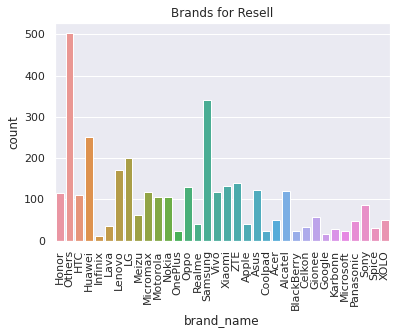

In [ ]:
sns.countplot(data=df, x='brand_name');
plt.xticks(rotation=90)
plt.title("Brands for Resell")
plt.show()

* The brand column will be too granular for most multivariate analysis. 
* To work around this, I am creating a phone type column with 4 buckets: low cost, medium cost, high cost, and luxury based on the interquartile range for normalized phone prices. 


In [ ]:
# Create a new column for phone cost with 5 bins
df['phone_type']=pd.cut(df['normalized_new_price'],bins=[0,4.79,5.24,5.67, 7.9],labels=['Low Cost', 'Medium Cost', 'High Cost','Luxury'], right=True)

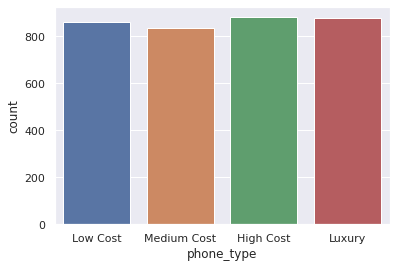

In [ ]:
sns.countplot(data=df, x='phone_type');
plt.show()

**Observations on categorical columns:**

*   A majority of phones use Android operating systems.
*   4g phones are more common than 5g. 
*   The brand name column is very granular data, and little can be observed since the highest bin is "other".
*  The used phone market seeings fairly equivalent across the phone types. This means a low cost phone is as sellable as a luxury phone. 






### Multivariate Analysis

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# Dropping release_year as it is a temporal variable
cols_list.remove("release_year")

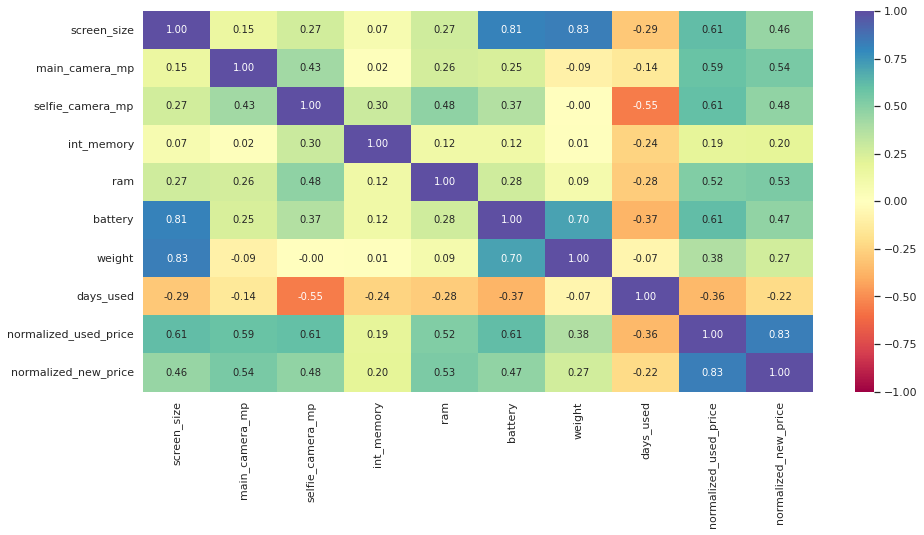

In [ ]:
corr=df[cols_list].corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();

**Observations**

*   The heat map shows little correlation between the numereical categories with the exception of used and new price which have a .83 correlation, and screen size having a .81 correlation to battery and a .83 coorrelation to weight.
*   It will be importent to keep an eye on the p values for phone prices, weight, screen size, and battery as this could be indicators of multicollinearity. 

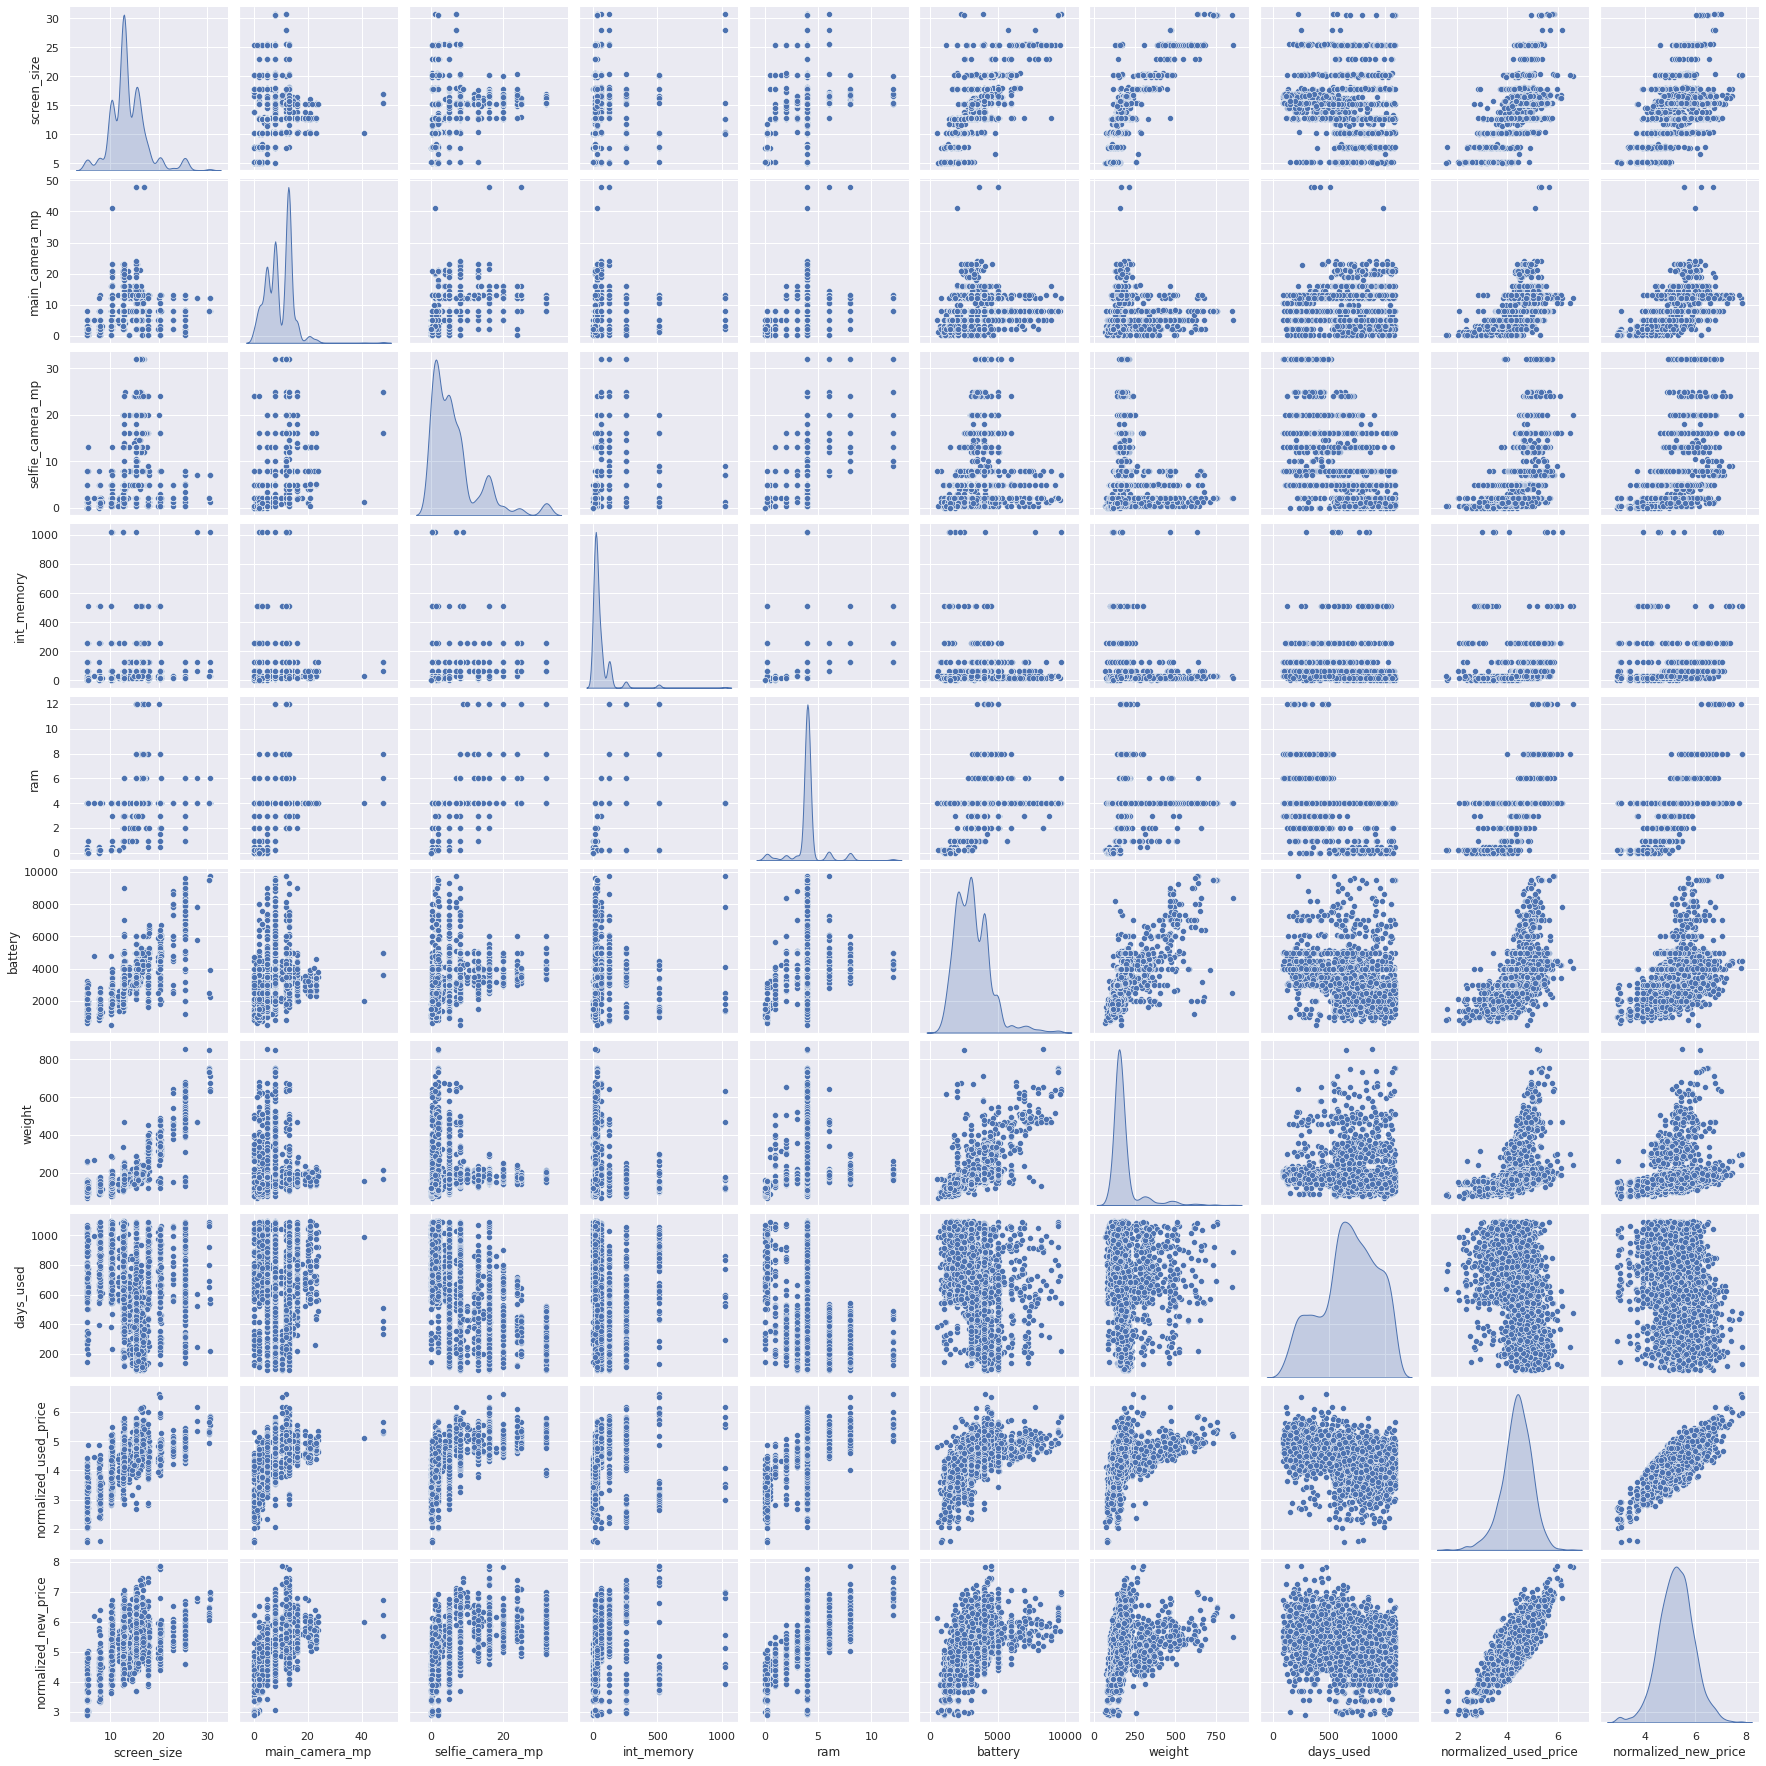

In [ ]:
sns.pairplot(df[cols_list], diag_kind="kde");
plt.show()

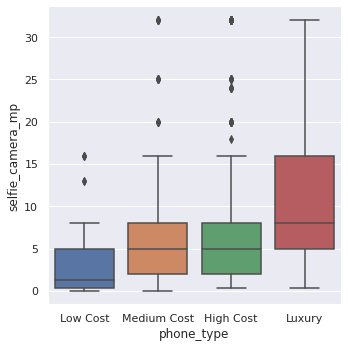

In [ ]:
sns.catplot(data=df, x='phone_type', y='selfie_camera_mp', kind='box');
plt.show()

**Observations**

*   We see that a majority of phones have selfie cameras with 10mp or less. The biggest variance in selfie camera resolution is in the luxury phone group. This makes sense as the higher the quality of megapixels, the more expensive the camera parts could be. 



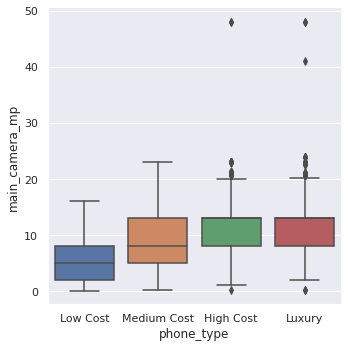

In [ ]:
sns.catplot(data=df, x='phone_type', y='main_camera_mp', kind='box');
plt.show()

**Observations**

*   We see that most phones have main cameras with 20 mp or less. 
*   Unlike with the selfie camera, the range is much shorter. 
*   The megapixel quality on main cameras go as high as 50mps and are exclusive to high cost or luxury phones. 





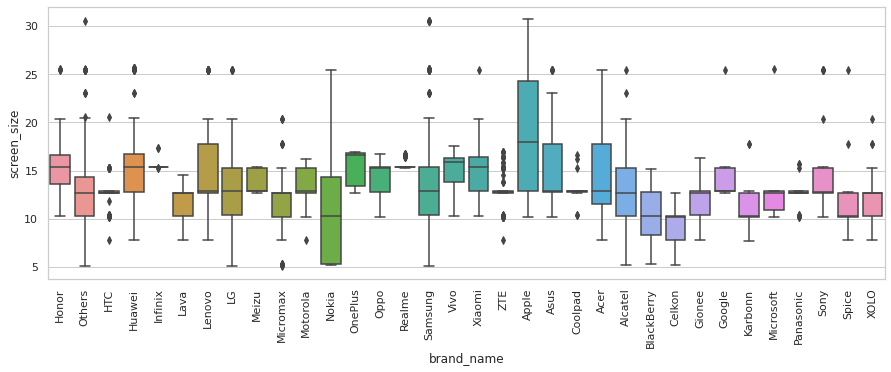

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="screen_size")
plt.xticks(rotation=90)
plt.show()

***Observations***


*   A majority of phone brands have screen sizes falling in the 10 to 20 cm range.
*   However, Apple phones seem to have the greatest variety of large screen phones compared to competetors. While Nokia has the greatest range of small screen phones.


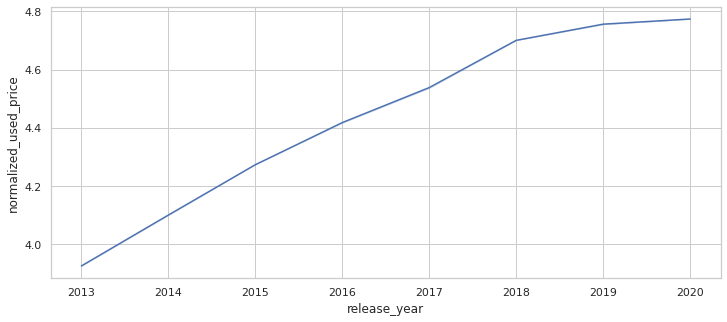

In [ ]:
# Create a graph of the average used phone price based on it's release year
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='release_year', y='normalized_used_price', ci=False, estimator='mean');
plt.show()

**Observations**

*   Normalized used phone prices saw an increase each year from 2013-2020.
*   The years 2013-2016 saw a steeper increase in phone costs compared to 2016-2020. 



### Data Preprocessing

#### Missing values treatment

In [ ]:
df1=df.copy()

In [ ]:
df.median()

screen_size               12.830
main_camera_mp             8.000
selfie_camera_mp           5.000
int_memory                32.000
ram                        4.000
battery                 3000.000
weight                   160.000
release_year            2015.500
days_used                690.500
normalized_used_price      4.405
normalized_new_price       5.246
dtype: float64

In [ ]:
# Create a list of columns with missing values
cols_impute=[
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory", "ram",
    "battery",
    "weight"
]
# Function that transforms missing values into the column's median value
for col in cols_impute:
    df1[col]=df1[col].fillna(
        value=df1.groupby(["brand_name"])["release_year"].transform("median"))


In [ ]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
phone_type               0
dtype: int64

#### Feature Engineering

In [ ]:
# Create a new column for the age of the phone
df1['age_of_phone']=2021-df1['release_year']
# Drop release year since the column
df1.drop('release_year', axis=1, inplace=True)
df1['age_of_phone'].describe()

count   3454.000
mean       5.035
std        2.298
min        1.000
25%        3.000
50%        5.500
75%        7.000
max        8.000
Name: age_of_phone, dtype: float64

***Observations***=

*   The average age of phones based on their release year is 5 years old. 
*   This is very close to the median age of 5.5 years. 



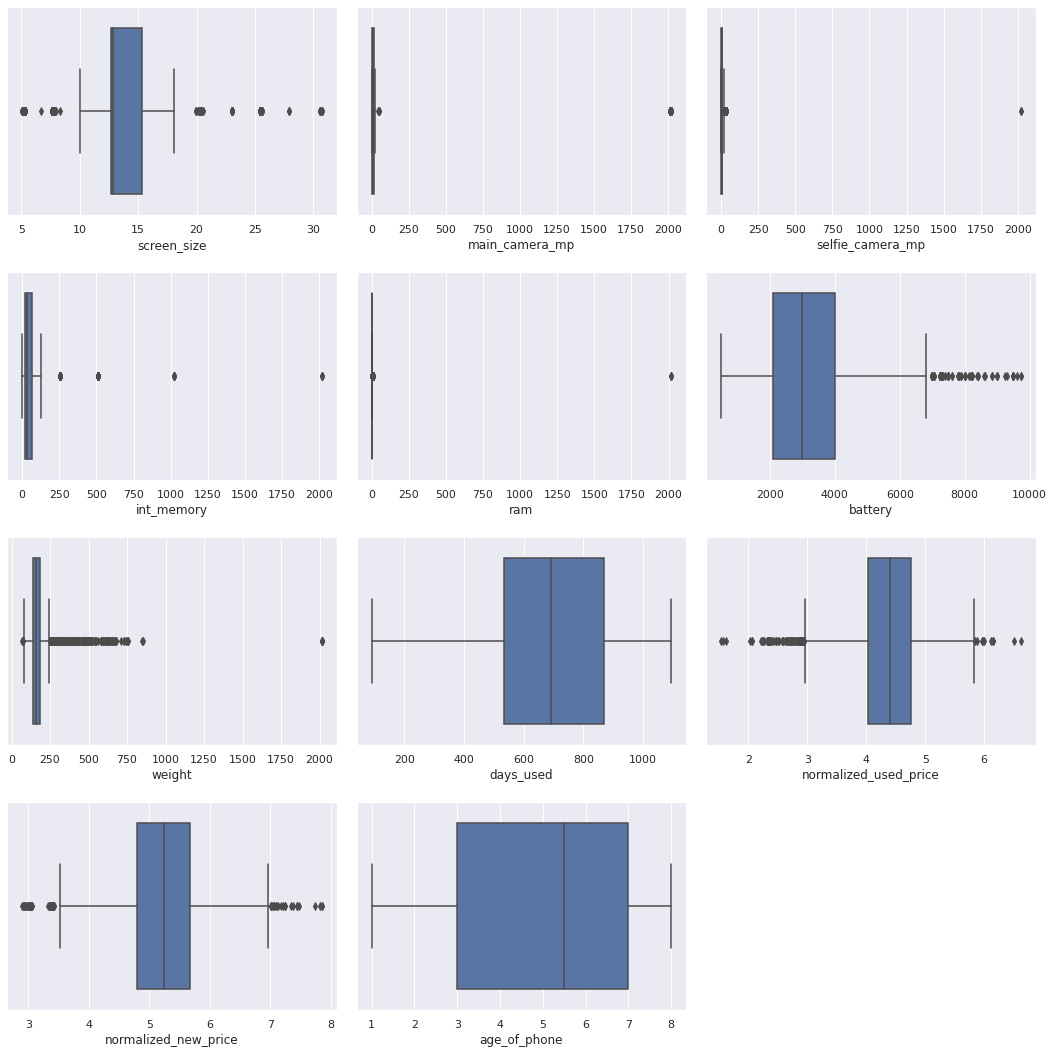

In [ ]:
# Outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()



*   The phone market has variability in phone specs such as battery screen size, prices, and age of resell. 
*   We also observe outliers in numerical data that is usually standardized such as ram and internal memory. However these outliers do not greatly impact our data and are not outside the realm of possiblity, so they will remain factors in this model. 


In [ ]:
# Remove the categorical column from the df1 database
df1.drop(['brand_name'], axis=1, inplace=True)
df1.head()

os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android       14.500  yes   no          13.000             5.000   
1  Android       17.300  yes  yes          13.000            16.000   
2  Android       16.690  yes  yes          13.000             8.000   
3  Android       25.500  yes  yes          13.000             8.000   
4  Android       15.320  yes   no          13.000             8.000   

   int_memory   ram  battery  weight  days_used  normalized_used_price  \
0      64.000 3.000 3020.000 146.000        127                  4.308   
1     128.000 8.000 4300.000 213.000        325                  5.162   
2     128.000 8.000 4200.000 213.000        162                  5.111   
3      64.000 6.000 7250.000 480.000        345                  5.135   
4      64.000 3.000 5000.000 185.000        293                  4.390   

   normalized_new_price   phone_type  age_of_phone  
0                 4.715     Low Cost             1  
1                 5.519    High Cost             1  
2                 5.885       Luxury             1  
3                 5.631    High Cost             1  
4                 4.948  Medium Cost             1

In [ ]:
# Create dummy variables
df1 = pd.get_dummies(df1,
    columns=df1.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

df1.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  battery  \
0       14.500          13.000             5.000      64.000 3.000 3020.000   
1       17.300          13.000            16.000     128.000 8.000 4300.000   
2       16.690          13.000             8.000     128.000 8.000 4200.000   
3       25.500          13.000             8.000      64.000 6.000 7250.000   
4       15.320          13.000             8.000      64.000 3.000 5000.000   

   weight  days_used  normalized_used_price  normalized_new_price  \
0 146.000        127                  4.308                 4.715   
1 213.000        325                  5.162                 5.519   
2 213.000        162                  5.111                 5.885   
3 480.000        345                  5.135                 5.631   
4 185.000        293                  4.390                 4.948   

   age_of_phone  os_Others  os_Windows  os_iOS  4g_yes  5g_yes  \
0             1          0           0       0       1       0   
1             1          0           0       0       1       1   
2             1          0           0       0       1       1   
3             1          0           0       0       1       1   
4             1          0           0       0       1       0   

   phone_type_Medium Cost  phone_type_High Cost  phone_type_Luxury  
0                       0                     0                  0  
1                       0                     1                  0  
2                       0                     0                  1  
3                       0                     1                  0  
4                       1                     0                  0

### Model Building

In [ ]:
# Create the X and y values for the model
X=df1.drop(['normalized_used_price'], axis=1)
y=df1['normalized_used_price']

In [ ]:
X.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  battery  \
0       14.500          13.000             5.000      64.000 3.000 3020.000   
1       17.300          13.000            16.000     128.000 8.000 4300.000   
2       16.690          13.000             8.000     128.000 8.000 4200.000   
3       25.500          13.000             8.000      64.000 6.000 7250.000   
4       15.320          13.000             8.000      64.000 3.000 5000.000   

   weight  days_used  normalized_new_price  age_of_phone  os_Others  \
0 146.000        127                 4.715             1          0   
1 213.000        325                 5.519             1          0   
2 213.000        162                 5.885             1          0   
3 480.000        345                 5.631             1          0   
4 185.000        293                 4.948             1          0   

   os_Windows  os_iOS  4g_yes  5g_yes  phone_type_Medium Cost  \
0           0       0       1       0                       0   
1           0       0       1       1                       0   
2           0       0       1       1                       0   
3           0       0       1       1                       0   
4           0       0       1       0                       1   

   phone_type_High Cost  phone_type_Luxury  
0                     0                  0  
1                     1                  0  
2                     0                  1  
3                     1                  0  
4                     0                  0

In [ ]:
# Add intercept to data
X= sm.add_constant(X)

In [ ]:
# Split the data in 70:30 ratio for taining and testing
x_train, x_test, y_train, y_test=train_test_split(
    X,y,test_size=.30,random_state=1
    )

In [ ]:
# Create a regression analysis using the training data
olsmod=sm.OLS(y_train,x_train)
olsres=olsmod.fit()

print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.814
Model:                               OLS   Adj. R-squared:                  0.812
Method:                    Least Squares   F-statistic:                     582.1
Date:                   Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                           22:17:56   Log-Likelihood:                -97.146
No. Observations:                   2417   AIC:                             232.3
Df Residuals:                       2398   BIC:                             342.3
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Observations**

*   In our first model attempt the R-squared score is 0.814. This means our model explains 84% of the variance in the training set.
*   The adjusted R-squared score is 0.812. 
*   The constant coefficient is 0.8219.




### Checking Linear Regression Assumptions

In [ ]:
# Check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    345.295
screen_size                3.793
main_camera_mp             1.346
selfie_camera_mp           1.031
int_memory                 1.136
ram                        1.023
battery                    3.553
weight                     1.581
days_used                  2.567
normalized_new_price       7.404
age_of_phone               3.878
os_Others                  1.404
os_Windows                 1.026
os_iOS                     1.072
4g_yes                     2.138
5g_yes                     1.471
phone_type_Medium Cost     2.538
phone_type_High Cost       4.519
phone_type_Luxury          8.914
dtype: float64



**Observations**

*   Upon reviewing the variance inflation factor scores, we see that normalized_new_price has a hig VIF score.
*   We will ignore the VIF values for dummy variables and the constant.  



In [ ]:
# Remove normalized_new_price from the second training group
X_train2 = x_train.drop(["normalized_new_price"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.741 
Adjusted R-squared: 0.739


**Observations**

*   When we remove the new phone price, the adjusted R-squared score changes from .812 to .739. This .073 drop shows the normalized new price is relevant and should remain in the model. 



###Dealing with high p-value variables

In [ ]:
# Revisit the p-values for the predictors
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.814
Model:                               OLS   Adj. R-squared:                  0.812
Method:                    Least Squares   F-statistic:                     582.1
Date:                   Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                           22:19:38   Log-Likelihood:                -97.146
No. Observations:                   2417   AIC:                             232.3
Df Residuals:                       2398   BIC:                             342.3
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Observations**

*  Reviewing our model again, we see that main camera, internal memory, OS Windows and 5g Yes all have P values greater than .5. 
*  We will try removing each column to see if the column is truly relevant to our prediction model. 





In [ ]:
# initial list of columns
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'normalized_new_price', 'age_of_phone', 'os_iOS', '4g_yes', 'phone_type_High Cost', 'phone_type_Luxury']


In [ ]:
# Create new train and test variables that removes predictors with p-values >.5
x_train3=x_train[selected_features]
x_test3=x_test[selected_features]

In [ ]:
olsmod2=sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.813
Model:                               OLS   Adj. R-squared:                  0.812
Method:                    Least Squares   F-statistic:                     1495.
Date:                   Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                           22:20:11   Log-Likelihood:                -103.16
No. Observations:                   2417   AIC:                             222.3
Df Residuals:                       2409   BIC:                             268.6
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observations**

*   There was a .001 decrease in the R-squared value, while the adjusted R-squared stayed the same. 
*  We will move forward to the final model with our final 7 predictors. 

### Checking Regression Assumptions

In [ ]:
df_pred = pd.DataFrame()
# Create a dataframe with actual, fitted, and residual values based on our training model
df_pred["Actual Values"] = y_train.values.flatten()
df_pred["Fitted Values"] = olsmod2.fittedvalues.values 
df_pred["Residuals"] = olsmod2.resid.values

df_pred.head()


Actual Values  Fitted Values  Residuals
0          4.087          3.868      0.220
1          4.448          4.592     -0.144
2          4.315          4.215      0.100
3          4.282          4.341     -0.058
4          4.456          4.328      0.128

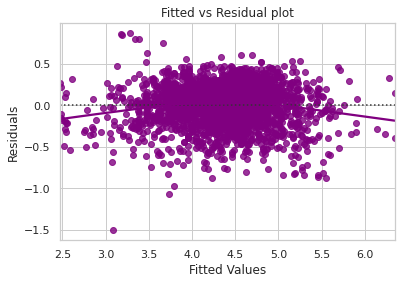

In [ ]:
# Plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

*   There is no pattern to this plot so the assumptions of linearity and independence are satisified. 



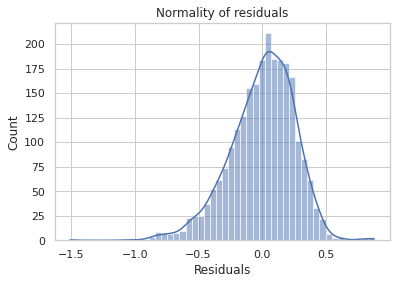

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**


*   The above histogram for residuals has the bell shape we are looking for even though it is showing skewness. 


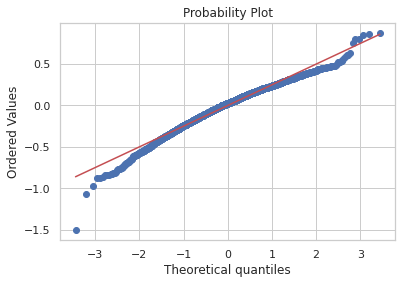

In [ ]:
import pylab
import scipy.stats as stats
# Plot residucals on a Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

*   The above Q-Q plot shows the residuals are following a straight line, even if the tails are slightly off.  
*   Lets look at the results of the Shapiro-Wilk test. 



In [ ]:
# Conduct Shapiro-Wilks test on the residuals
stats.shapiro(df_pred["Residuals"])

(0.9789659976959229, 1.9919731309631954e-18)

**Observations**
*   The Q-Q plot and Shapiro-Wilk test are used together to check if residualsare normally distributed. 
*   In this case, the Shapiro-Wilk test shows the residuals are not normally distributed. 
*   Upon reviewing the results of this test and the Q-Q plot, I see how the tail ends are impacting the interpretation of normal distribution. 
*   In this case we will continue the assumption that the residuals are normally distributed. 










In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
# Conduct a goldfeldquandt test for homoscedasticity
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0733934867651413), ('p-value', 0.10998407904046172)]

**Observations**

*   The p-value >.05 indicates the residuals are homoscedastic.
*   We can move forward considering this assumption satisfied.



###Predictions on test data

In [ ]:
# Check the model parameters
olsmod2.params

const                   0.830
screen_size             0.036
normalized_new_price    0.625
age_of_phone           -0.047
os_iOS                 -0.174
4g_yes                  0.089
phone_type_High Cost   -0.039
phone_type_Luxury      -0.155
dtype: float64

Observations: 
*   These predictors as well as the constant can be used to write out the model's equation. 
*   We will use this model to compare our actual and predicted values in the test group. 

In [ ]:
# Predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995   4.567      4.310
2341   3.696      3.957
1913   3.592      3.726
688    4.306      4.179
650    4.522      5.182
2291   4.259      4.370
40     4.998      5.405
1884   3.875      4.136
2538   4.207      4.196
45     5.380      5.322



*   The results of the test data are that our normalized predicted used prices are not far off from the actual values. 

In [ ]:
# Generate the RSME score for the training group
rsme1=np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rsme1

0.2525216230108432

In [ ]:
# Generate the RSME score for the test group
y_pred=olsmod2.predict(x_test3)
rsme2=np.sqrt(mean_squared_error(y_test,y_pred))
rsme2

0.2553987688664243

***Observations:***
*   The RSME from the training group and test group are very similar. 
*   This is a good indicator that our model has not overfit the data. 


### Final Model

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.813
Model:                               OLS   Adj. R-squared:                  0.812
Method:                    Least Squares   F-statistic:                     1495.
Date:                   Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                           22:20:55   Log-Likelihood:                -103.16
No. Observations:                   2417   AIC:                             222.3
Df Residuals:                       2409   BIC:                             268.6
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Results and Conclusions



*   The model explains 81% of the ReCell data.
*   Each time screen size goes up by one unit, then it's normalized used price increases by .0358. 
*   Each year the phone ages, it's used price decreases by .0471. 
*   Researchers could further define the "Other" category in Brand Names for more insight into each brand's resell value. 
*   Other phone features such as audio quality, screen resolution could provide helpful insight. 
*   Another area to evaluate is the typical buyer. You can look at reason for purchase, age, gender for more insight on phones that are more likely to sell to different demographics.





